In [1]:
import pandas as pd
import os
import nltk
import string 
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ludov\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ludov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ludov\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ludov\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Extracting text files and putting them in a dataframe with their class label

In [2]:
categories = os.listdir( os.getcwd()+"\\dataset" )
path = os.getcwd()+"\\dataset"

list_texts = []
for categ in categories:
    category_folder = path+str("\\")+categ
    category_files = os.listdir(category_folder)
    for f in category_files:
        file_path   = path+str("\\")+categ+str("\\")+f
        file_text = open(file_path, "r").read() 
        row = (file_text , categ) 
        list_texts.append(row)
        

In [3]:
df_texts = pd.DataFrame(list_texts,columns=["text","class_label"])
del list_texts

# Text processing (removal of punctuation , stop-words, converting to lowercase)

In [4]:
len(df_texts.drop_duplicates()) == len(df_texts)

False

There are some duplicate texts in our dataframe! Let's remove them!

In [5]:
df_texts = df_texts.drop_duplicates()

In [6]:
len(df_texts)

3874

In [7]:
df_texts["character_length"] = df_texts.text.apply(len)

In [8]:
df_texts.groupby("class_label").character_length.mean()

class_label
exploration       1794.716216
headhunters       1356.984720
intelligence      2649.290323
logistics         2183.263918
politics          1236.131012
transportation    1253.643098
weapons           2196.888278
Name: character_length, dtype: float64

In [9]:
lemmatizer = WordNetLemmatizer() 
def process_text(text):
    text = text.lower()
    # removing punctuation symbols
    text = text.translate(str.maketrans('', '', string.punctuation))
    # removing stopwords
    list_stopwords = stopwords.words('english')
    text_tokens = word_tokenize(text)
    tokens_without_sw = [lemmatizer.lemmatize(word) for word in text_tokens if not word in list_stopwords]
    #tokens_without_sw = [lemmatizer.lemmatize(word) for word in tokens_without_sw] 
    return ' '.join(tokens_without_sw)

In [10]:
import time

In [11]:
start = time.time()
df_texts["text_processed"] = df_texts.text.apply(process_text)
end = time.time()
print(end-start)

25.04121685028076


# Exploratory analysis-Feasability of a bag-of-words model¶


In this section; I will investigate whether the categories of texts can be distinguished by a set of informative vocabulary words. If thats is so, a bag-of-words model is warranted. I suspect the kind of words that are most informative (to guess the category) are nouns and verbs. Therefore I will start by finding the most frequent words by category 

In [12]:
def count_words_by_category(df_texts,category):
    word_list = []
    for t in df_texts[df_texts.class_label==category].text_processed:
        t = nltk.pos_tag(t.split())
        for i in range(len(t)):
            tupl=t[i]
            if tupl[1].startswith("NN") or tupl[1].startswith("VB") :
                word_list.append(tupl[0])
    
    words = pd.DataFrame({'num_events': word_list})
    df_words = words.num_events.value_counts().sort_values(ascending=False).to_frame().reset_index()
    df_words["class_label"] = [category]* len(df_words)
    return df_words,words

In [13]:
df_words,words = count_words_by_category(df_texts,"exploration")
df_words[df_words.num_events>90]

,index,num_events,class_label
0,space,962,exploration
1,writes,452,exploration
2,article,397,exploration
3,year,316,exploration
4,system,299,exploration
...,...,...,...
64,want,93,exploration
65,going,92,exploration
66,group,92,exploration
67,lot,91,exploration


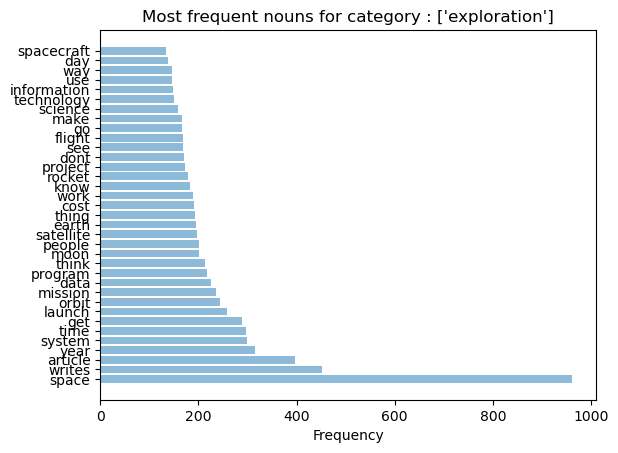

In [14]:

plt.rcdefaults()
fig, ax = plt.subplots()

words = tuple(df_words['index'].tolist())[:35]
words = [i for i in words]
y_pos = np.arange(len(words))
performance = np.array(df_words.num_events)[:35]
error = np.random.rand(len(words))


plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, words)
plt.xlabel('Frequency')
plt.title('Most frequent nouns for category : ' +str(df_words.class_label.unique()))
 
plt.show()

One can see that the most typical words for category "exploration" are things like: space,launch,orbit,satellite, earth,moon, rocket

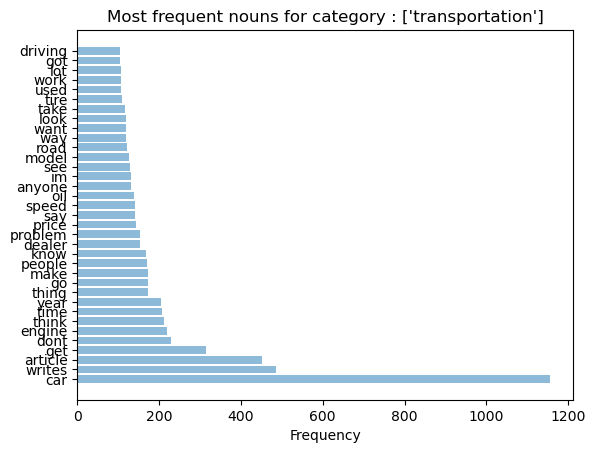

In [15]:
df_words,words = count_words_by_category(df_texts,"transportation")
df_words[df_words.num_events>90]

plt.rcdefaults()
fig, ax = plt.subplots()

words = tuple(df_words['index'].tolist())[:35]
words = [i for i in words]
y_pos = np.arange(len(words))
performance = np.array(df_words.num_events)[:35]
error = np.random.rand(len(words))


plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, words)
plt.xlabel('Frequency')
plt.title('Most frequent nouns for category : ' +str(df_words.class_label.unique()))
 
plt.show()


Among the most frequent words for category "transportation" we find : car,engine,speed,oil,tire,road

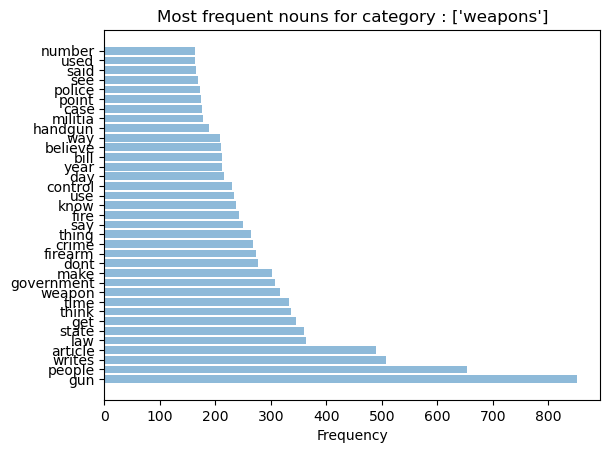

In [16]:
df_words,words = count_words_by_category(df_texts,"weapons")
df_words[df_words.num_events>90]

plt.rcdefaults()
fig, ax = plt.subplots()

words = tuple(df_words['index'].tolist())[:35]
words = [i for i in words]
y_pos = np.arange(len(words))
performance = np.array(df_words.num_events)[:35]
error = np.random.rand(len(words))


plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, words)
plt.xlabel('Frequency')
plt.title('Most frequent nouns for category : ' +str(df_words.class_label.unique()))
 
plt.show()


Among the most frequent words for category "weapons" we find : gun,law,weapon,crime,handgun,militia

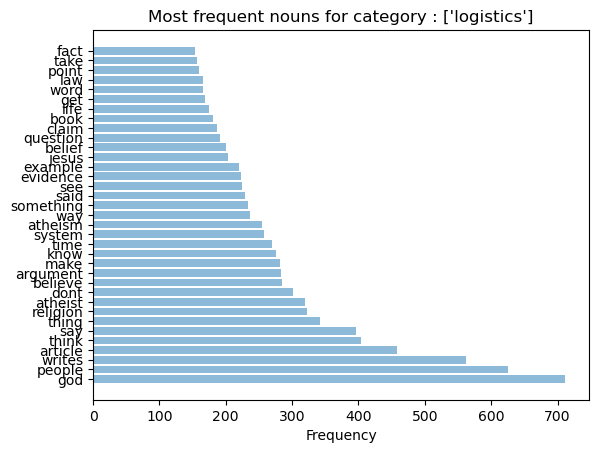

In [17]:
df_words,words = count_words_by_category(df_texts,"logistics")
df_words[df_words.num_events>90]

plt.rcdefaults()
fig, ax = plt.subplots()

words = tuple(df_words['index'].tolist())[:35]
words = [i for i in words]
y_pos = np.arange(len(words))
performance = np.array(df_words.num_events)[:35]
error = np.random.rand(len(words))


plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, words)
plt.xlabel('Frequency')
plt.title('Most frequent nouns for category : ' +str(df_words.class_label.unique()))
 
plt.show()


Among the most frequent words for category "logistics" we find : God,religion,atheist,believe,Jesus. It seems to me the name of the folder category is deceptive; since most of these texts are talking about religious belief and not logistics.

In [18]:
df_texts[df_texts.class_label=="exploration"].text_processed.iloc[0].split().count("space")

3

In [19]:
df_texts["space"]   = df_texts.text_processed.apply(lambda x: x.split().count("space") )
df_texts["moon"]    = df_texts.text_processed.apply(lambda x: x.split().count("moon") )
df_texts["atheism"] = df_texts.text_processed.apply(lambda x: x.split().count("atheism") )

Text(0.5, 1.0, 'Frequency of word by text-category : space')

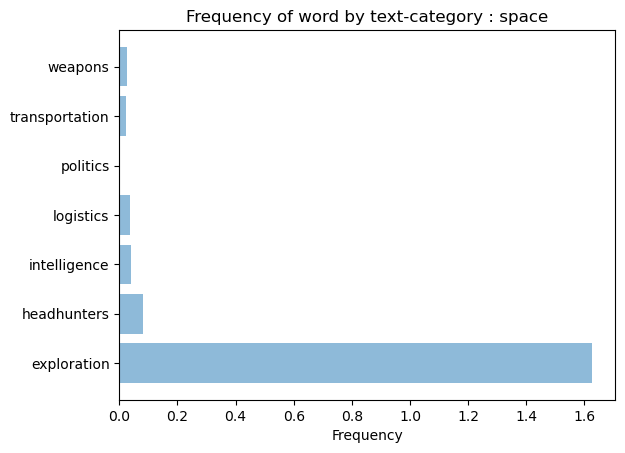

In [20]:
space = df_texts.groupby("class_label").space.mean().reset_index()
atheism = df_texts.groupby("class_label").atheism.mean().reset_index()
y_pos = np.arange(len(space))
plt.barh(y_pos, space.space, align='center', alpha=0.5)
plt.yticks(y_pos, space.class_label)
plt.xlabel('Frequency')
plt.title('Frequency of word by text-category : ' +"space")

The word "space" for example is far more often used in texts belonging to category "exploration" than any other. This word is highly informative

Text(0.5, 1.0, 'Frequency of word by text-category : atheism')

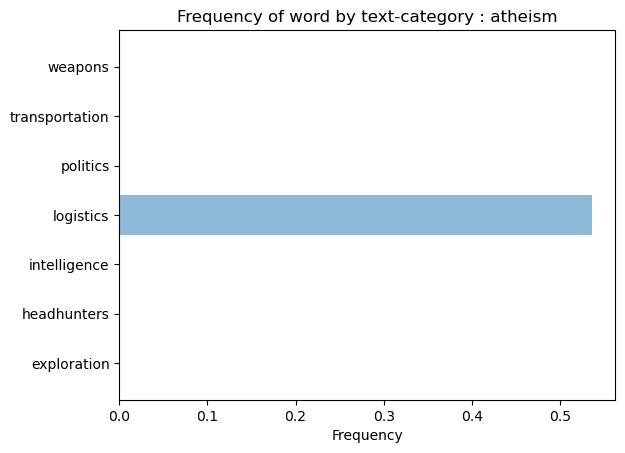

In [21]:
atheism = df_texts.groupby("class_label").atheism.mean().reset_index()
y_pos = np.arange(len(atheism))
plt.barh(y_pos, atheism.atheism, align='center', alpha=0.5)
plt.yticks(y_pos, atheism.class_label)
plt.xlabel('Frequency')
plt.title('Frequency of word by text-category : ' +"atheism")

The word "atheism", on the other hand is almost exclusively used in documents under the category "logistics"; which as I have said before, is wrongly labeled (should be named something like "religion")

# Bag-of-words model

We have seen that the texts greatly differ by the words they use most frequently; therefore a Bag-of-Words model should be most useful to classify these documents. 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

In [23]:
count_vect       = CountVectorizer()

In [24]:
def class_to_num(category):
    if category=="exploration":
        return 0
    if category=="headhunters":
        return 1
    if category == "intelligence":
        return 2
    if category == "logistics":
        return 3
    if category == "politics":
        return 4
    if category == "transportation":
        return 5
    if category=="weapons":
        return 6

df_texts["target"] = df_texts["class_label"].apply(class_to_num)

In [25]:
X = df_texts["text_processed"]
y = df_texts["target"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

X_train_counts = count_vect.fit_transform(X_train)
X_test_counts  = count_vect.transform(X_test)

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [27]:
clf_naive_bayes   = MultinomialNB().fit(X_train_counts, y_train)
clf_random_forest = RandomForestClassifier(max_samples=100,max_features=40).fit(X_train_counts, y_train)
clf_logit         = LogisticRegression(random_state=0).fit(X_train_counts, y_train)

In [28]:
predicted_naive_bayes   = clf_naive_bayes.predict(X_test_counts)
predicted_random_forest = clf_random_forest.predict(X_test_counts) 
predicted_logit         = clf_logit.predict(X_test_counts)

In [29]:
np.mean(predicted_naive_bayes == y_test)

0.9390148553557467

In [30]:
np.mean(predicted_random_forest == y_test)

0.5105551211884285

In [31]:
np.mean(predicted_logit == y_test)

0.9007036747458952

In [32]:
from sklearn import neighbors

In [33]:
clf_neighbors = neighbors.KNeighborsClassifier(n_neighbors=7)

In [34]:
clf_neighbors = clf_neighbors.fit(X_train_counts, y_train)

In [35]:
predicted_neighbors = clf_neighbors.predict(X_test_counts)

In [36]:
np.mean(predicted_neighbors == y_test)

0.43862392494136043

Upon simple inspection ; it seems that the Naive Bayes classifier gives the best overall performance on the test set of around 93% accuracy. Therefore in our executables "train.py" and "classify.py" we choose the Bag-of-Words+Naive Bayes model 